In [1]:
import pandas as pd
import wave
import struct
import glob
import os
import librosa
import librosa.display 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
%matplotlib inline

def parse_wave_python(filename):
    with wave.open(filename, 'rb') as wave_file:
        sample_rate = wave_file.getframerate()
        length_in_seconds = wave_file.getnframes() / sample_rate
        
        first_sample = struct.unpack(
            '<h', wave_file.readframes(1))[0]
        second_sample = struct.unpack(
            '<h', wave_file.readframes(1))[0]
    print('''
Parsed {filename}
-----------------------------------------------
Channels: {num_channels}
Sample Rate: {sample_rate}
First Sample: {first_sample}
Second Sample: {second_sample}
Length in Seconds: {length_in_seconds}'''.format(
            filename=filename,
            num_channels=wave_file.getnchannels(),
            sample_rate=wave_file.getframerate(),
            first_sample=first_sample,
            second_sample=second_sample,
            length_in_seconds=length_in_seconds))
        
parse_wave_python('C:/Users/choiy/Desktop/urban-sound-classification/Train_folder/Train/1.wav')



Parsed C:/Users/choiy/Desktop/urban-sound-classification/Train_folder/Train/1.wav
-----------------------------------------------
Channels: 1
Sample Rate: 48000
First Sample: -3939
Second Sample: -4940
Length in Seconds: 4.0


In [2]:
#To extract the useful features from sound data, we will use Librosa library
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

In [3]:
mfccs, chroma, mel, contrast,tonnetz = extract_feature('C:/Users/choiy/Desktop/urban-sound-classification/Train_folder/Train/6.wav')

In [4]:
mfccs

array([-2.45410406e+02,  1.21052236e+02, -4.07367811e+01,  1.89909410e+01,
       -2.03483389e+01,  7.64263686e+00,  1.58522846e+00,  5.09826064e-03,
        1.24704191e+01,  6.39572192e+00, -2.68159332e+00,  1.85971107e-02,
        3.84043532e+00,  8.97338308e+00, -4.38464085e-01,  1.01788355e+01,
       -1.07655474e+00,  1.27683208e+00, -6.36330925e+00,  9.46003328e-01,
       -1.42756253e+00,  4.28782473e+00,  3.12706203e-01,  4.20204359e+00,
       -1.31589991e+00,  5.35122743e+00, -1.34595365e+00,  1.16651461e+00,
       -2.87437922e+00,  1.23788373e+00, -3.06293866e+00, -6.24273734e-01,
       -2.20876017e+00,  5.94245118e-01, -5.54315919e+00, -8.74694580e-01,
       -3.00665888e+00, -3.13271081e+00, -5.32709845e+00, -2.04835950e+00])

In [5]:
# reading csv file  
df = pd.read_csv("C:/Users/choiy/Desktop/urban-sound-classification/Train_folder/train.csv") 
df.head()

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


In [6]:
lista = df['Class'].unique().tolist()

In [7]:
wavcatalog = [i for i in enumerate(lista)]

In [8]:
wavcatalog

[(0, 'siren'),
 (1, 'street_music'),
 (2, 'drilling'),
 (3, 'dog_bark'),
 (4, 'children_playing'),
 (5, 'gun_shot'),
 (6, 'engine_idling'),
 (7, 'air_conditioner'),
 (8, 'jackhammer'),
 (9, 'car_horn')]

In [9]:
#get drilling
wavcatalog[2][1]
#get tuple (2, drilling)
wavcatalog[2]

(2, 'drilling')

In [10]:
features, labels = np.empty((0,193)), np.empty(0)
for i in range(df.shape[0]):
   number = df.iloc[i,0]
   label = df.iloc[i,1]
   filename = f'{number}.wav'
   lbl = f'{label}'
   try:
       mfccs, chroma, mel, contrast,tonnetz = extract_feature(f'C:/Users/choiy/Desktop/urban-sound-classification/Train_folder/Train/{filename}')
   except:
       print(f"File {filename} didn't work")
       continue
   ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
   features = np.vstack([features,ext_features])
   if label == wavcatalog[0][1]:
        labels = np.append(labels, wavcatalog[0][0])
   elif label == wavcatalog[1][1]:
        labels = np.append(labels, wavcatalog[1][0])
   elif label == wavcatalog[2][1]:
        labels = np.append(labels, wavcatalog[2][0])
   elif label == wavcatalog[3][1]:
        labels = np.append(labels, wavcatalog[3][0])
   elif label == wavcatalog[4][1]:
        labels = np.append(labels, wavcatalog[4][0])
   elif label == wavcatalog[5][1]:
        labels = np.append(labels, wavcatalog[5][0])
   elif label == wavcatalog[6][1]:
        labels = np.append(labels, wavcatalog[6][0])
   elif label == wavcatalog[7][1]:
        labels = np.append(labels, wavcatalog[7][0])
   elif label == wavcatalog[8][1]:
        labels = np.append(labels, wavcatalog[8][0])
   elif label == wavcatalog[9][1]:
        labels = np.append(labels, wavcatalog[9][0])
  
   #labels = np.append(labels, fn.split('/')[2].split('-')[1])
    #return np.array(features), np.array(labels, dtype = np.int)
   
   #print(chroma)
   #print(filename)
   #print(lbl)
#     print(df.iloc[i,0])

C:\Users\choiy\Anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
C:\Users\choiy\Anaconda3\lib\site-packages\librosa\util\utils.py:1476: RuntimeWarning: invalid value encountered in less
  if np.any(X < 0) or np.any(X_ref < 0):
C:\Users\choiy\Anaconda3\lib\site-packages\librosa\util\utils.py:1488: RuntimeWarning: invalid value encountered in maximum
  Z = np.maximum(X, X_ref).astype(dtype)
C:\Users\choiy\Anaconda3\lib\site-packages\librosa\util\utils.py:1489: RuntimeWarning: invalid value encountered in less
  bad_idx = (Z < np.finfo(dtype).tiny)


File 1488.wav didn't work


In [77]:
labels

array([0., 1., 2., ..., 6., 6., 7.])

In [78]:
features

array([[-7.50957191e+01,  1.29611846e+02, -3.26698975e+01, ...,
         1.57509179e-03, -5.37471939e-03,  5.26261495e-03],
       [-8.35056669e+00,  1.13704109e+02, -1.91475123e+01, ...,
        -5.36374958e-03,  2.90953126e-03, -1.54599678e-03],
       [-1.15225264e+02,  3.67671473e+00, -3.87245168e+01, ...,
         2.73520672e-02, -9.37955141e-03, -4.78768348e-03],
       ...,
       [-3.12261079e+02,  4.62412806e+01,  5.05164659e+00, ...,
         1.62614482e-01, -3.83779053e-02, -1.89554327e-02],
       [-2.71249094e+02,  1.33006300e+02, -2.83203666e+01, ...,
         2.02666673e-01, -1.93794808e-02, -5.00848620e-02],
       [-2.91026597e+02,  2.33391865e+02, -4.70676553e+00, ...,
         5.15215980e-02,  1.03867911e-02, -1.45272843e-02]])

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(features)

In [80]:
scaled_train_samples

array([[0.71283036, 0.59447857, 0.56851254, ..., 0.40620691, 0.46932733,
        0.27467782],
       [0.78216945, 0.54631151, 0.62625267, ..., 0.39764163, 0.52111423,
        0.25072002],
       [0.67114125, 0.21315939, 0.54265952, ..., 0.43802591, 0.44429214,
        0.23931333],
       ...,
       [0.46644797, 0.34204071, 0.72958225, ..., 0.60499331, 0.26301626,
        0.18946056],
       [0.50905382, 0.60475664, 0.58708489, ..., 0.65443357, 0.38178011,
        0.07992387],
       [0.4885077 , 0.90871424, 0.68791416, ..., 0.46786068, 0.56785643,
        0.20504211]])

In [81]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [82]:
#Create Layers
model = Sequential([
    Dense(16, input_shape=(193,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                3104      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 3,978
Trainable params: 3,978
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [85]:
model.fit(scaled_train_samples, labels, validation_split=0.1, batch_size=10, epochs=200, shuffle=True, verbose=2)

Train on 4890 samples, validate on 544 samples
Epoch 1/200
 - 1s - loss: 2.2826 - acc: 0.1031 - val_loss: 2.2678 - val_acc: 0.1268
Epoch 2/200
 - 1s - loss: 2.2455 - acc: 0.1407 - val_loss: 2.2360 - val_acc: 0.1563
Epoch 3/200
 - 1s - loss: 2.2059 - acc: 0.1988 - val_loss: 2.1857 - val_acc: 0.2408
Epoch 4/200
 - 1s - loss: 2.1524 - acc: 0.2401 - val_loss: 2.1257 - val_acc: 0.2555
Epoch 5/200
 - 1s - loss: 2.0945 - acc: 0.2483 - val_loss: 2.0626 - val_acc: 0.2665
Epoch 6/200
 - 1s - loss: 2.0340 - acc: 0.2748 - val_loss: 2.0031 - val_acc: 0.2757
Epoch 7/200
 - 1s - loss: 1.9755 - acc: 0.2861 - val_loss: 1.9560 - val_acc: 0.2978
Epoch 8/200
 - 1s - loss: 1.9320 - acc: 0.3110 - val_loss: 1.9191 - val_acc: 0.3015
Epoch 9/200
 - 1s - loss: 1.8944 - acc: 0.3170 - val_loss: 1.8879 - val_acc: 0.3382
Epoch 10/200
 - 1s - loss: 1.8599 - acc: 0.3376 - val_loss: 1.8523 - val_acc: 0.3566
Epoch 11/200
 - 1s - loss: 1.8289 - acc: 0.3648 - val_loss: 1.8269 - val_acc: 0.3768
Epoch 12/200
 - 1s - loss: 

Epoch 97/200
 - 1s - loss: 0.9552 - acc: 0.6885 - val_loss: 1.0113 - val_acc: 0.6710
Epoch 98/200
 - 1s - loss: 0.9511 - acc: 0.6885 - val_loss: 1.0054 - val_acc: 0.6691
Epoch 99/200
 - 1s - loss: 0.9482 - acc: 0.6857 - val_loss: 1.0090 - val_acc: 0.6654
Epoch 100/200
 - 1s - loss: 0.9454 - acc: 0.6951 - val_loss: 1.0051 - val_acc: 0.6728
Epoch 101/200
 - 0s - loss: 0.9422 - acc: 0.6914 - val_loss: 0.9982 - val_acc: 0.6801
Epoch 102/200
 - 1s - loss: 0.9392 - acc: 0.6888 - val_loss: 1.0079 - val_acc: 0.6691
Epoch 103/200
 - 0s - loss: 0.9354 - acc: 0.6908 - val_loss: 1.0040 - val_acc: 0.6710
Epoch 104/200
 - 0s - loss: 0.9341 - acc: 0.6928 - val_loss: 0.9951 - val_acc: 0.6728
Epoch 105/200
 - 0s - loss: 0.9299 - acc: 0.6955 - val_loss: 0.9950 - val_acc: 0.6728
Epoch 106/200
 - 0s - loss: 0.9274 - acc: 0.6939 - val_loss: 0.9926 - val_acc: 0.6710
Epoch 107/200
 - 0s - loss: 0.9226 - acc: 0.6975 - val_loss: 0.9894 - val_acc: 0.6746
Epoch 108/200
 - 1s - loss: 0.9200 - acc: 0.7000 - val_lo

Epoch 193/200
 - 1s - loss: 0.7383 - acc: 0.7634 - val_loss: 0.8402 - val_acc: 0.7261
Epoch 194/200
 - 1s - loss: 0.7377 - acc: 0.7648 - val_loss: 0.8360 - val_acc: 0.7335
Epoch 195/200
 - 1s - loss: 0.7367 - acc: 0.7618 - val_loss: 0.8524 - val_acc: 0.7151
Epoch 196/200
 - 1s - loss: 0.7357 - acc: 0.7667 - val_loss: 0.8323 - val_acc: 0.7279
Epoch 197/200
 - 1s - loss: 0.7336 - acc: 0.7693 - val_loss: 0.8378 - val_acc: 0.7243
Epoch 198/200
 - 1s - loss: 0.7309 - acc: 0.7669 - val_loss: 0.8394 - val_acc: 0.7206
Epoch 199/200
 - 0s - loss: 0.7313 - acc: 0.7679 - val_loss: 0.8370 - val_acc: 0.7188
Epoch 200/200
 - 0s - loss: 0.7325 - acc: 0.7667 - val_loss: 0.8269 - val_acc: 0.7243


In [76]:
#Notes-Validation loss should go down and validation accuracy goes up (which should be close to 1)
#Model has been trained to a .46 percent accuracy rate (that the data is categorized correctly ) 
#Increasing the Epoch to get closer to 1
#Turn array into dataframe, 

In [43]:
df_1 = pd.DataFrame(features)
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-75.095719,129.611846,-32.669898,15.285441,-2.378207,14.626390,-3.764634,17.962046,-2.011992,14.395796,...,13.581584,15.363746,15.579746,35.387758,-0.004255,0.014481,-0.040944,0.001575,-0.005375,0.005263
1,-8.350567,113.704109,-19.147512,29.386994,-13.745963,7.170843,-12.804698,8.102789,-9.090141,-2.810667,...,17.756826,18.226822,16.085308,34.338946,0.003580,0.010518,-0.084111,-0.005364,0.002910,-0.001546
2,-115.225264,3.676715,-38.724517,-4.002133,-15.980845,-11.146253,1.778062,4.020408,-2.446081,11.607701,...,14.026372,16.014877,17.438533,31.626253,0.001479,-0.004756,0.013443,0.027352,-0.009380,-0.004788
3,-211.840458,87.311125,-53.307992,10.788239,-46.073711,13.174044,20.365529,14.869042,0.525608,-4.480130,...,27.707668,21.865110,26.985700,42.099477,-0.000115,-0.036755,-0.126207,-0.032240,0.059965,-0.026851
4,-235.825635,132.952580,42.155849,18.454956,12.176050,11.412190,-1.725005,10.437025,-0.802941,4.525129,...,16.328094,16.194166,16.016508,31.238708,-0.000755,0.010912,0.038104,-0.002897,-0.002296,-0.001802


In [44]:
chroma

array([0.71506648, 0.77021513, 0.70044269, 0.72784109, 0.94054654,
       0.45094541, 0.45398111, 0.41769169, 0.75254925, 0.86674994,
       0.65933695, 0.58184525])

In [45]:
mfccs

array([-2.91026597e+02,  2.33391865e+02, -4.70676553e+00,  4.67810543e+00,
        1.65518945e+01,  3.64023639e+00,  1.47995742e+01,  4.46623145e+00,
        4.33502610e+00,  8.88061131e+00,  3.20686321e+00,  3.88334884e+00,
        9.93451821e-01, -1.05600323e+00,  4.93780228e+00,  6.91566398e+00,
        3.23145224e+00, -4.60808952e+00, -7.58890372e+00, -5.96945275e-01,
        1.08831380e+00, -1.00955481e+00,  2.19535620e+00, -7.77371656e-01,
       -6.96977786e+00, -6.60477265e+00, -4.63290128e+00, -2.00019048e+00,
        3.09516474e-01,  1.04093821e+00,  4.55525992e+00,  5.63577893e+00,
        5.74717382e-01, -3.73062101e+00, -6.64239291e+00, -7.92701909e+00,
       -3.40596001e+00,  2.77268092e-01, -3.50107728e-01, -1.72377591e-02])

In [86]:
df_2 = pd.DataFrame(mfccs)
df_3 = pd.DataFrame(chroma)
df_4 = pd.DataFrame(mel)
df_5 = pd.DataFrame(contrast)
df_6 = pd.DataFrame(tonnetz)
#df_2.head()
df_2.describe()

,0
count,40.000000
mean,-0.601548
std,59.983533
min,-291.026597
25%,-3.487125
50%,0.442117
75%,4.367827
max,233.391865


In [87]:
df_3.describe()

,0
count,12.000000
mean,0.669768
std,0.165491
min,0.417692
25%,0.549879
50%,0.707755
75%,0.756966
max,0.940547


In [88]:
df_4.describe()

,0
count,128.000000
mean,2.040844
std,9.040526
min,0.000001
25%,0.000023
50%,0.006767
75%,0.334740
max,73.381120


In [89]:
df_5.describe()

,0
count,7.000000
mean,20.151036
std,4.926951
min,13.643453
25%,18.249586
50%,19.276948
75%,20.895363
max,29.846954


In [90]:
df_6.describe()

,0
count,6.000000
mean,-0.012705
std,0.043631
min,-0.080637
25%,-0.024798
50%,-0.014698
75%,0.004158
max,0.051522


In [91]:
# make sqlite connection and file path
from sqlalchemy import create_engine
disk_engine = create_engine('sqlite:///my_lite_store.db')
df_1.to_sql('wave_data', disk_engine, if_exists='append')

#df = pd.read_sql_query('SELECT * FROM wave_data,disk_engine)
#df.head()

In [92]:
db_df = pd.read_sql_query('SELECT * FROM wave_data',disk_engine)
db_df.head()

,index,0,1,2,3,4,5,6,7,8,...,183,184,185,186,187,188,189,190,191,192
0,0,-75.095719,129.611846,-32.669898,15.285441,-2.378207,14.626390,-3.764634,17.962046,-2.011992,...,13.581584,15.363746,15.579746,35.387758,-0.004255,0.014481,-0.040944,0.001575,-0.005375,0.005263
1,1,-8.350567,113.704109,-19.147512,29.386994,-13.745963,7.170843,-12.804698,8.102789,-9.090141,...,17.756826,18.226822,16.085308,34.338946,0.003580,0.010518,-0.084111,-0.005364,0.002910,-0.001546
2,2,-115.225264,3.676715,-38.724517,-4.002133,-15.980845,-11.146253,1.778062,4.020408,-2.446081,...,14.026372,16.014877,17.438533,31.626253,0.001479,-0.004756,0.013443,0.027352,-0.009380,-0.004788
3,3,-211.840458,87.311125,-53.307992,10.788239,-46.073711,13.174044,20.365529,14.869042,0.525608,...,27.707668,21.865110,26.985700,42.099477,-0.000115,-0.036755,-0.126207,-0.032240,0.059965,-0.026851
4,4,-235.825635,132.952580,42.155849,18.454956,12.176050,11.412190,-1.725005,10.437025,-0.802941,...,16.328094,16.194166,16.016508,31.238708,-0.000755,0.010912,0.038104,-0.002897,-0.002296,-0.001802


In [93]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [94]:
# Assign X (data) and y (target)
X_train = df_1
y_train = labels
print(X_train.shape, y_train.shape)

(5434, 193) (5434,)


In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=1, stratify=y_train)
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = pd.DataFrame(X_scaler.transform(X_train))
X_test_scaled = pd.DataFrame(X_scaler.transform(X_test))

k: 9, Train/Test Score: 0.890/0.843
k: 11, Train/Test Score: 0.864/0.826
k: 13, Train/Test Score: 0.848/0.812
k: 15, Train/Test Score: 0.827/0.794
k: 17, Train/Test Score: 0.814/0.779
k: 19, Train/Test Score: 0.800/0.762
k: 21, Train/Test Score: 0.789/0.751
k: 23, Train/Test Score: 0.778/0.737
k: 25, Train/Test Score: 0.769/0.730
k: 27, Train/Test Score: 0.757/0.720
k: 29, Train/Test Score: 0.746/0.707
k: 31, Train/Test Score: 0.737/0.705
k: 33, Train/Test Score: 0.733/0.689
k: 35, Train/Test Score: 0.725/0.691
k: 37, Train/Test Score: 0.719/0.678
k: 39, Train/Test Score: 0.709/0.672
k: 41, Train/Test Score: 0.698/0.662
k: 43, Train/Test Score: 0.685/0.650


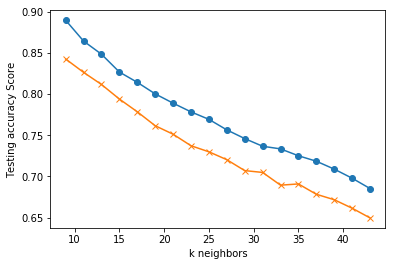

In [99]:
train_scores = []
test_scores = []
for k in range(9, 45, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    #knn.fit(X_train, y_train)
    #train_score = knn.score(X_train, y_train)
    #test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(9, 45, 2), train_scores, marker='o')
plt.plot(range(9, 45, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [146]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('k=29 Test Acc: %.3f' % knn.score(X_test, y_test))

k=29 Test Acc: 0.907


In [142]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [1,5,10,15,20,25,29] ,
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2],
              'leaf_size': [10,30,50,70],
             'weights': ['uniform','distance'],
             'n_jobs': [1,5,10,20]}
grid = GridSearchCV(knn, param_grid, verbose=3)

In [143]:
grid.fit(X_train, y_train)

C:\Users\choiy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1792 candidates, totalling 5376 fits
[CV] algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=uniform, score=0.9110294117647059, total=   0.5s
[CV] algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=uniform 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=uniform, score=0.9138438880706922, total=   0.5s
[CV] algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=uniform 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=uniform, score=0.9204126750184229, total=   0.5s
[CV] algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=distance, score=0.9110294117647059, total=   0.5s
[CV] algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=distance, score=0.9138438880706922, total=   0.6s
[CV] algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=distance, score=0.9204126750184229, total=   0.5s
[CV] algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=1, p=2, weights=uniform, score=0.8632352941176471, total=   0.7s
[CV] algorithm=auto, leaf_size=10, n_jobs=1, n_neig

[CV]  algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=uniform, score=0.6955882352941176, total=   1.4s
[CV] algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=uniform, score=0.6678939617083947, total=   1.5s
[CV] algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=uniform, score=0.6713338246131172, total=   1.2s
[CV] algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=distance, score=0.7485294117647059, total=   1.4s
[CV] algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=distance, score=0.7511045655375552, total=   1.5s
[CV] algorithm=auto, leaf_size=10, n_jobs=1,

[CV]  algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=29, p=2, weights=distance, score=0.6921944035346097, total=   1.6s
[CV] algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=1, n_neighbors=29, p=2, weights=distance, score=0.6897568165070007, total=   1.5s
[CV] algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=1, p=1, weights=uniform, score=0.9110294117647059, total=   1.7s
[CV] algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=1, p=1, weights=uniform, score=0.9138438880706922, total=   0.2s
[CV] algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=1, p=1, weights=uniform, score=0.9204126750184229, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_jobs=5, n_neig

[CV]  algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=uniform, score=0.7229182019159912, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=distance, score=0.7897058823529411, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=distance, score=0.7812960235640648, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=distance, score=0.782608695652174, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=15, p=2, weights=uniform, score=0.6955882352941176, total=   0.6s
[CV] algorithm=auto, leaf_size=10, n_jobs=5

[CV]  algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=29, p=2, weights=uniform, score=0.5904411764705882, total=   0.5s
[CV] algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=29, p=2, weights=uniform, score=0.5942562592047128, total=   0.5s
[CV] algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=29, p=2, weights=uniform, score=0.5954310980103169, total=   0.6s
[CV] algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=29, p=2, weights=distance, score=0.7051470588235295, total=   0.5s
[CV] algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=5, n_neighbors=29, p=2, weights=distance, score=0.6921944035346097, total=   0.5s
[CV] algorithm=auto, leaf_size=10, n_jobs=5,

[CV]  algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=10, p=2, weights=distance, score=0.7798232695139912, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=10, p=2, weights=distance, score=0.7752394988946205, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=15, p=1, weights=uniform, score=0.7352941176470589, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=15, p=1, weights=uniform, score=0.7106038291605302, total=   0.2s
[CV] algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=15, p=1, weights=uniform, score=0.7229182019159912, total=   0.2s
[CV] algorithm=auto, leaf_size=10, n

[CV]  algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=29, p=1, weights=uniform, score=0.6337509211495947, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=29, p=1, weights=distance, score=0.7411764705882353, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=29, p=1, weights=distance, score=0.7290132547864506, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=29, p=1, weights=distance, score=0.7273397199705232, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=10, n_neighbors=29, p=2, weights=uniform, score=0.5904411764705882, total=   0.4s
[CV] algorithm=auto, leaf_size=10

[CV]  algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=uniform, score=0.7213235294117647, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=uniform, score=0.7157584683357879, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=uniform, score=0.7251289609432572, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=distance, score=0.7764705882352941, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=distance, score=0.7798232695139912, total=   0.3s
[CV] algorithm=auto, leaf_size=10, 

[CV]  algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=25, p=2, weights=distance, score=0.7047128129602357, total=   0.4s
[CV] algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=25, p=2, weights=distance, score=0.6949152542372882, total=   0.4s
[CV] algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=29, p=1, weights=uniform, score=0.649264705882353, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=29, p=1, weights=uniform, score=0.6222385861561119, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=20, n_neighbors=29, p=1, weights=uniform, score=0.6337509211495947, total=   0.3s
[CV] algorithm=auto, leaf_size=10, n_

[CV]  algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=uniform, score=0.7759764185703758, total=   0.7s
[CV] algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=distance, score=0.8242647058823529, total=   0.8s
[CV] algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=distance, score=0.8195876288659794, total=   0.7s
[CV] algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=distance, score=0.8260869565217391, total=   0.7s
[CV] algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=10, p=2, weights=uniform, score=0.7213235294117647, total=   0.6s
[CV] algorithm=auto, leaf_size=30, n_jobs=

[CV]  algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=25, p=2, weights=uniform, score=0.6205882352941177, total=   0.9s
[CV] algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=25, p=2, weights=uniform, score=0.6097201767304861, total=   0.9s
[CV] algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=25, p=2, weights=uniform, score=0.6138540899042004, total=   0.8s
[CV] algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=25, p=2, weights=distance, score=0.7191176470588235, total=   0.8s
[CV] algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=1, n_neighbors=25, p=2, weights=distance, score=0.7047128129602357, total=   0.9s
[CV] algorithm=auto, leaf_size=30, n_jobs=1,

[CV]  algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=5, p=2, weights=distance, score=0.8269513991163475, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=5, p=2, weights=distance, score=0.8165070007369197, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=10, p=1, weights=uniform, score=0.7779411764705882, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=10, p=1, weights=uniform, score=0.7584683357879234, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=10, p=1, weights=uniform, score=0.7759764185703758, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=5, n_n

[CV]  algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=25, p=1, weights=uniform, score=0.6595431098010317, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=25, p=1, weights=distance, score=0.7566176470588235, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=25, p=1, weights=distance, score=0.7371134020618557, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=25, p=1, weights=distance, score=0.7428150331613854, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=5, n_neighbors=25, p=2, weights=uniform, score=0.6205882352941177, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=

[CV]  algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=5, p=2, weights=uniform, score=0.7919117647058823, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=5, p=2, weights=uniform, score=0.7812960235640648, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=5, p=2, weights=uniform, score=0.7789240972733972, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=5, p=2, weights=distance, score=0.8213235294117647, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=5, p=2, weights=distance, score=0.8269513991163475, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_jobs=10

[CV]  algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=20, p=2, weights=distance, score=0.7260677466863034, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=20, p=2, weights=distance, score=0.7214443625644805, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=25, p=1, weights=uniform, score=0.675, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=25, p=1, weights=uniform, score=0.6524300441826215, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=10, n_neighbors=25, p=1, weights=uniform, score=0.6595431098010317, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=10, n_n

[CV]  algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=5, p=1, weights=uniform, score=0.8341930729550479, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=5, p=1, weights=distance, score=0.8595588235294118, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=5, p=1, weights=distance, score=0.8681885125184094, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=5, p=1, weights=distance, score=0.8577745025792188, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=5, p=2, weights=uniform, score=0.7919117647058823, total=   0.3s
[CV] algorithm=auto, leaf_size=30, n_jobs=

[CV]  algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=20, p=2, weights=uniform, score=0.6485294117647059, total=   0.5s
[CV] algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=20, p=2, weights=uniform, score=0.6377025036818851, total=   0.3s
[CV] algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=20, p=2, weights=uniform, score=0.6462785556374355, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=20, p=2, weights=distance, score=0.7352941176470589, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_jobs=20, n_neighbors=20, p=2, weights=distance, score=0.7260677466863034, total=   0.2s
[CV] algorithm=auto, leaf_size=30, 

[CV]  algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=1, p=2, weights=distance, score=0.8703976435935199, total=   0.5s
[CV] algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=1, p=2, weights=distance, score=0.8754605747973471, total=   0.4s
[CV] algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=5, p=1, weights=uniform, score=0.8352941176470589, total=   0.7s
[CV] algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=5, p=1, weights=uniform, score=0.8276877761413843, total=   0.6s
[CV] algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=5, p=1, weights=uniform, score=0.8341930729550479, total=   0.6s
[CV] algorithm=auto, leaf_size=50, n_jobs=1, n_neighbo

[CV]  algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=20, p=1, weights=uniform, score=0.7030213706705969, total=   0.7s
[CV] algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=20, p=1, weights=distance, score=0.7727941176470589, total=   0.7s
[CV] algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=20, p=1, weights=distance, score=0.751840942562592, total=   0.7s
[CV] algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=20, p=1, weights=distance, score=0.765659543109801, total=   0.7s
[CV] algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=1, n_neighbors=20, p=2, weights=uniform, score=0.6485294117647059, total=   0.7s
[CV] algorithm=auto, leaf_size=50, n_jobs=1,

[CV]  algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=1, p=2, weights=uniform, score=0.8632352941176471, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=1, p=2, weights=uniform, score=0.8703976435935199, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=1, p=2, weights=uniform, score=0.8754605747973471, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=1, p=2, weights=distance, score=0.8632352941176471, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=1, p=2, weights=distance, score=0.8703976435935199, total=   0.2s
[CV] algorithm=auto, leaf_size=50, n_jobs=5, n_neighb

[CV]  algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=15, p=2, weights=distance, score=0.7511045655375552, total=   0.2s
[CV] algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=15, p=2, weights=distance, score=0.7494473102431835, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=20, p=1, weights=uniform, score=0.6985294117647058, total=   0.2s
[CV] algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=20, p=1, weights=uniform, score=0.6745213549337261, total=   0.2s
[CV] algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=5, n_neighbors=20, p=1, weights=uniform, score=0.7030213706705969, total=   0.2s
[CV] algorithm=auto, leaf_size=50, n_jobs=5, 

[CV]  algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=1, p=1, weights=uniform, score=0.9204126750184229, total=   1.2s
[CV] algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=1, p=1, weights=distance, score=0.9110294117647059, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=1, p=1, weights=distance, score=0.9138438880706922, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=1, p=1, weights=distance, score=0.9204126750184229, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=1, p=2, weights=uniform, score=0.8632352941176471, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=

[CV]  algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=15, p=2, weights=uniform, score=0.6955882352941176, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=15, p=2, weights=uniform, score=0.6678939617083947, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=15, p=2, weights=uniform, score=0.6713338246131172, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=15, p=2, weights=distance, score=0.7485294117647059, total=   0.2s
[CV] algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=15, p=2, weights=distance, score=0.7511045655375552, total=   0.1s
[CV] algorithm=auto, leaf_size=50, 

[CV]  algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=29, p=2, weights=distance, score=0.6921944035346097, total=   0.2s
[CV] algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=10, n_neighbors=29, p=2, weights=distance, score=0.6897568165070007, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=1, p=1, weights=uniform, score=0.9110294117647059, total=   0.4s
[CV] algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=1, p=1, weights=uniform, score=0.9138438880706922, total=   0.3s
[CV] algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=1, p=1, weights=uniform, score=0.9204126750184229, total=   1.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=

[CV]  algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=15, p=1, weights=uniform, score=0.7229182019159912, total=   0.2s
[CV] algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=15, p=1, weights=distance, score=0.7897058823529411, total=   0.2s
[CV] algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=15, p=1, weights=distance, score=0.7812960235640648, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=15, p=1, weights=distance, score=0.782608695652174, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=uniform, score=0.6955882352941176, total=   0.1s
[CV] algorithm=auto, leaf_size=50,

[CV]  algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=29, p=2, weights=uniform, score=0.5904411764705882, total=   0.2s
[CV] algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=29, p=2, weights=uniform, score=0.5942562592047128, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=29, p=2, weights=uniform, score=0.5954310980103169, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=29, p=2, weights=distance, score=0.7051470588235295, total=   0.1s
[CV] algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=50, n_jobs=20, n_neighbors=29, p=2, weights=distance, score=0.6921944035346097, total=   0.1s
[CV] algorithm=auto, leaf_size=50, 

[CV]  algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=10, p=2, weights=distance, score=0.7798232695139912, total=   0.7s
[CV] algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=10, p=2, weights=distance, score=0.7752394988946205, total=   0.5s
[CV] algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=uniform, score=0.7352941176470589, total=   0.7s
[CV] algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=uniform, score=0.7106038291605302, total=   0.7s
[CV] algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=uniform, score=0.7229182019159912, total=   0.7s
[CV] algorithm=auto, leaf_size=70, n_jobs=1, 

[CV]  algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=uniform, score=0.6337509211495947, total=   0.7s
[CV] algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=distance, score=0.7411764705882353, total=   0.8s
[CV] algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=distance, score=0.7290132547864506, total=   0.8s
[CV] algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=distance, score=0.7273397199705232, total=   0.7s
[CV] algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=1, n_neighbors=29, p=2, weights=uniform, score=0.5904411764705882, total=   0.7s
[CV] algorithm=auto, leaf_size=70, n_jobs=

[CV]  algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=10, p=2, weights=uniform, score=0.7213235294117647, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=10, p=2, weights=uniform, score=0.7157584683357879, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=10, p=2, weights=uniform, score=0.7251289609432572, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=10, p=2, weights=distance, score=0.7764705882352941, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=10, p=2, weights=distance, score=0.7798232695139912, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=5,

[CV]  algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=25, p=2, weights=distance, score=0.7047128129602357, total=   0.2s
[CV] algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=25, p=2, weights=distance, score=0.6949152542372882, total=   0.2s
[CV] algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=29, p=1, weights=uniform, score=0.649264705882353, total=   0.2s
[CV] algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=29, p=1, weights=uniform, score=0.6222385861561119, total=   0.2s
[CV] algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=5, n_neighbors=29, p=1, weights=uniform, score=0.6337509211495947, total=   0.2s
[CV] algorithm=auto, leaf_size=70, n_jobs=5, n

[CV]  algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=10, p=1, weights=uniform, score=0.7759764185703758, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=10, p=1, weights=distance, score=0.8242647058823529, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=10, p=1, weights=distance, score=0.8195876288659794, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=10, p=1, weights=distance, score=0.8260869565217391, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=10, p=2, weights=uniform, score=0.7213235294117647, total=   0.1s
[CV] algorithm=auto, leaf_size=70

[CV]  algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=25, p=2, weights=uniform, score=0.6205882352941177, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=25, p=2, weights=uniform, score=0.6097201767304861, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=25, p=2, weights=uniform, score=0.6138540899042004, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=25, p=2, weights=distance, score=0.7191176470588235, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=10, n_neighbors=25, p=2, weights=distance, score=0.7047128129602357, total=   0.1s
[CV] algorithm=auto, leaf_size=70, 

[CV]  algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=5, p=2, weights=distance, score=0.8269513991163475, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=5, p=2, weights=distance, score=0.8165070007369197, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=uniform, score=0.7779411764705882, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=uniform, score=0.7584683357879234, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=uniform, score=0.7759764185703758, total=   0.2s
[CV] algorithm=auto, leaf_size=70, n_jo

[CV]  algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=25, p=1, weights=uniform, score=0.6595431098010317, total=   0.1s
[CV] algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=25, p=1, weights=distance, score=0.7566176470588235, total=   0.2s
[CV] algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=25, p=1, weights=distance, score=0.7371134020618557, total=   0.2s
[CV] algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=25, p=1, weights=distance, score=0.7428150331613854, total=   0.2s
[CV] algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=uniform, score=0.6205882352941177, total=   0.2s
[CV] algorithm=auto, leaf_size=70

[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=5, p=1, weights=distance, score=0.8577745025792188, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.7919117647058823, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.7812960235640648, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.7789240972733972, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=distance, score=0.8213235294117647, total=   0.6s
[CV] algo

[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=20, p=2, weights=uniform, score=0.6377025036818851, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=20, p=2, weights=uniform, score=0.6462785556374355, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=20, p=2, weights=distance, score=0.7352941176470589, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=20, p=2, weights=distance, score=0.7260677466863034, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=1, n_neighbors=20, p=2, weights=distance, score=0.7214443625644805, total=   0.

[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=1, p=2, weights=distance, score=0.8632352941176471, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=1, p=2, weights=distance, score=0.8703976435935199, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=1, p=2, weights=distance, score=0.8754605747973471, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=5, p=1, weights=uniform, score=0.8352941176470589, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=5, p=1, weights=uniform, score=0.8276877761413843, total=   0.2s
[CV] al

[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=15, p=2, weights=distance, score=0.7494473102431835, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=20, p=1, weights=uniform, score=0.6985294117647058, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=20, p=1, weights=uniform, score=0.6745213549337261, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=20, p=1, weights=uniform, score=0.7030213706705969, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=5, n_neighbors=20, p=1, weights=distance, score=0.7727941176470589, total=   0.2s


[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=1, p=1, weights=uniform, score=0.9138438880706922, total=   1.4s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=1, p=1, weights=uniform, score=0.9204126750184229, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=1, p=1, weights=distance, score=0.9110294117647059, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=1, p=1, weights=distance, score=0.9138438880706922, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=1, p=1, weights=distance, score=0.9204126750184229, total=   0.

[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=15, p=1, weights=distance, score=0.7897058823529411, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=15, p=1, weights=distance, score=0.7812960235640648, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=15, p=1, weights=distance, score=0.782608695652174, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=15, p=2, weights=uniform, score=0.6955882352941176, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=15, p=2, weights=uniform, score=0.6678939617083947, tota

[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=29, p=1, weights=distance, score=0.7273397199705232, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=29, p=2, weights=uniform, score=0.5904411764705882, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=29, p=2, weights=uniform, score=0.5942562592047128, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=29, p=2, weights=uniform, score=0.5954310980103169, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=10, n_neighbors=29, p=2, weights=distance, score=0.7051470588235295, total

[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=uniform, score=0.7157584683357879, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=uniform, score=0.7251289609432572, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=distance, score=0.7764705882352941, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=distance, score=0.7798232695139912, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=2, weights=distance, score=0.7752394988946205, to

[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=25, p=2, weights=distance, score=0.7191176470588235, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=25, p=2, weights=distance, score=0.7047128129602357, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=25, p=2, weights=distance, score=0.6949152542372882, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=29, p=1, weights=uniform, score=0.649264705882353, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_jobs=20, n_neighbors=29, p=1, weights=uniform, score=0.6222385861561119, tota

[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=5, p=2, weights=distance, score=0.8165070007369197, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=uniform, score=0.7779411764705882, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=uniform, score=0.7584683357879234, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=uniform, score=0.7759764185703758, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=10, p=1, weights=distance, score=0.8242647058823529, total=   0.8s
[

[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=25, p=1, weights=uniform, score=0.6524300441826215, total=   0.8s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=25, p=1, weights=uniform, score=0.6595431098010317, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=25, p=1, weights=distance, score=0.7566176470588235, total=   0.8s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=25, p=1, weights=distance, score=0.7371134020618557, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=1, n_neighbors=25, p=1, weights=distance, score=0.7428150331613854, total=   0.

[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=1, weights=distance, score=0.8595588235294118, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=1, weights=distance, score=0.8681885125184094, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=1, weights=distance, score=0.8577745025792188, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=2, weights=uniform, score=0.7919117647058823, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=2, weights=uniform, score=0.7812960235640648, total=   0.2s
[CV] al

[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=1, weights=distance, score=0.765659543109801, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=2, weights=uniform, score=0.6485294117647059, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=2, weights=uniform, score=0.6377025036818851, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=2, weights=uniform, score=0.6462785556374355, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=2, weights=distance, score=0.7352941176470589, total=   0.2s
[

[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=uniform, score=0.8703976435935199, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=uniform, score=0.8754605747973471, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=distance, score=0.8632352941176471, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=distance, score=0.8703976435935199, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=distance, score=0.8754605747973471, total=   0.

[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=15, p=2, weights=distance, score=0.7485294117647059, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=15, p=2, weights=distance, score=0.7511045655375552, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=15, p=2, weights=distance, score=0.7494473102431835, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=20, p=1, weights=uniform, score=0.6985294117647058, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=20, p=1, weights=uniform, score=0.6745213549337261, tot

[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=10, n_neighbors=29, p=2, weights=distance, score=0.6897568165070007, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=uniform, score=0.9110294117647059, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=uniform, score=0.9138438880706922, total=   0.4s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=uniform, score=0.9204126750184229, total=   0.9s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=distance, score=0.9110294117647059, total=   0.1s

[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=uniform, score=0.7106038291605302, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=uniform, score=0.7229182019159912, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=distance, score=0.7897058823529411, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=distance, score=0.7812960235640648, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=distance, score=0.782608695652174, tot

[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=1, weights=distance, score=0.7411764705882353, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=1, weights=distance, score=0.7290132547864506, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=1, weights=distance, score=0.7273397199705232, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=2, weights=uniform, score=0.5904411764705882, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=2, weights=uniform, score=0.5942562592047128, tot

[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=1, weights=distance, score=0.8260869565217391, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=uniform, score=0.7213235294117647, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=uniform, score=0.7157584683357879, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=uniform, score=0.7251289609432572, total=   0.6s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=distance, score=0.7764705882352941, total=   0.7s


[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=25, p=2, weights=uniform, score=0.6097201767304861, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=25, p=2, weights=uniform, score=0.6138540899042004, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=25, p=2, weights=distance, score=0.7191176470588235, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=25, p=2, weights=distance, score=0.7047128129602357, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=1, n_neighbors=25, p=2, weights=distance, score=0.6949152542372882, total=   0.

[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=5, p=2, weights=distance, score=0.8213235294117647, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=5, p=2, weights=distance, score=0.8269513991163475, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=5, p=2, weights=distance, score=0.8165070007369197, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=10, p=1, weights=uniform, score=0.7779411764705882, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=10, p=1, weights=uniform, score=0.7584683357879234, total=   0.2s
[CV

[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=20, p=2, weights=distance, score=0.7214443625644805, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=1, weights=uniform, score=0.675, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=1, weights=uniform, score=0.6524300441826215, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=1, weights=uniform, score=0.6595431098010317, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=1, weights=distance, score=0.7566176470588235, total=   0.2s
[CV] algorith

[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=uniform, score=0.8276877761413843, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=uniform, score=0.8341930729550479, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=distance, score=0.8595588235294118, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=distance, score=0.8681885125184094, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=distance, score=0.8577745025792188, total=   0.

[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=20, p=1, weights=distance, score=0.7727941176470589, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=20, p=1, weights=distance, score=0.751840942562592, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=20, p=1, weights=distance, score=0.765659543109801, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=20, p=2, weights=uniform, score=0.6485294117647059, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=10, n_neighbors=20, p=2, weights=uniform, score=0.6377025036818851, total

[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=1, p=1, weights=distance, score=0.9204126750184229, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=uniform, score=0.8632352941176471, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=uniform, score=0.8703976435935199, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=uniform, score=0.8754605747973471, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=distance, score=0.8632352941176471, total=   0.1s


[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=uniform, score=0.6678939617083947, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=uniform, score=0.6713338246131172, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=distance, score=0.7485294117647059, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=distance, score=0.7511045655375552, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=distance, score=0.7494473102431835, to

[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=29, p=2, weights=distance, score=0.7051470588235295, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=29, p=2, weights=distance, score=0.6921944035346097, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=50, n_jobs=20, n_neighbors=29, p=2, weights=distance, score=0.6897568165070007, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=1, p=1, weights=uniform, score=0.9110294117647059, total=   0.8s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=1, p=1, weights=uniform, score=0.9138438880706922, total=   0.

[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=10, p=2, weights=distance, score=0.7752394988946205, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=uniform, score=0.7352941176470589, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=uniform, score=0.7106038291605302, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=uniform, score=0.7229182019159912, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=distance, score=0.7897058823529411, total=   0.7s


[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=uniform, score=0.6222385861561119, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=uniform, score=0.6337509211495947, total=   0.8s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=distance, score=0.7411764705882353, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=distance, score=0.7290132547864506, total=   0.7s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=1, n_neighbors=29, p=1, weights=distance, score=0.7273397199705232, total=   0.

[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=10, p=1, weights=distance, score=0.8242647058823529, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=10, p=1, weights=distance, score=0.8195876288659794, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=10, p=1, weights=distance, score=0.8260869565217391, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=10, p=2, weights=uniform, score=0.7213235294117647, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=10, p=2, weights=uniform, score=0.7157584683357879, total=   0.2

[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=25, p=1, weights=distance, score=0.7428150331613854, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=25, p=2, weights=uniform, score=0.6205882352941177, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=25, p=2, weights=uniform, score=0.6097201767304861, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=25, p=2, weights=uniform, score=0.6138540899042004, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=5, n_neighbors=25, p=2, weights=distance, score=0.7191176470588235, total=   0.2s


[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=5, p=2, weights=uniform, score=0.7812960235640648, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=5, p=2, weights=uniform, score=0.7789240972733972, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=5, p=2, weights=distance, score=0.8213235294117647, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=5, p=2, weights=distance, score=0.8269513991163475, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=5, p=2, weights=distance, score=0.8165070007369197, total=   0.

[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=20, p=2, weights=distance, score=0.7352941176470589, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=20, p=2, weights=distance, score=0.7260677466863034, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=20, p=2, weights=distance, score=0.7214443625644805, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=25, p=1, weights=uniform, score=0.675, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=10, n_neighbors=25, p=1, weights=uniform, score=0.6524300441826215, total=   0.1s
[C

[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=1, p=2, weights=distance, score=0.8754605747973471, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=5, p=1, weights=uniform, score=0.8352941176470589, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=5, p=1, weights=uniform, score=0.8276877761413843, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=5, p=1, weights=uniform, score=0.8341930729550479, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=5, p=1, weights=distance, score=0.8595588235294118, total=   0.2s


[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=20, p=1, weights=uniform, score=0.6745213549337261, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=20, p=1, weights=uniform, score=0.7030213706705969, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=20, p=1, weights=distance, score=0.7727941176470589, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=20, p=1, weights=distance, score=0.751840942562592, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=70, n_jobs=20, n_neighbors=20, p=1, weights=distance, score=0.765659543109801, tota

[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=distance, score=0.9110294117647059, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=distance, score=0.9138438880706922, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=1, p=1, weights=distance, score=0.9204126750184229, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=1, p=2, weights=uniform, score=0.8632352941176471, total=   0.8s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=1, p=2, weights=uniform, score=0.8703976435935199, total=   0.7s
[CV] algorithm=kd_tree, l

[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=uniform, score=0.6955882352941176, total=   1.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=uniform, score=0.6678939617083947, total=   1.6s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=uniform, score=0.6713338246131172, total=   1.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=distance, score=0.7485294117647059, total=   1.4s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=15, p=2, weights=distance, score=0.7511045655375552, total=   1.5s
[CV] algorithm=kd

[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=29, p=2, weights=distance, score=0.7051470588235295, total=   1.7s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=29, p=2, weights=distance, score=0.6921944035346097, total=   1.7s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=1, n_neighbors=29, p=2, weights=distance, score=0.6897568165070007, total=   1.6s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=1, p=1, weights=uniform, score=0.9110294117647059, total=   1.2s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=1, p=1, weights=uniform, score=0.9138438880706922, total=   0.1s
[CV] algorithm=kd_tr

[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=uniform, score=0.7352941176470589, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=uniform, score=0.7106038291605302, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=uniform, score=0.7229182019159912, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=distance, score=0.7897058823529411, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=15, p=1, weights=distance, score=0.7812960235640648, total=   0.3s
[CV] algorithm=kd

[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=29, p=1, weights=distance, score=0.7411764705882353, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=29, p=1, weights=distance, score=0.7290132547864506, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=29, p=1, weights=distance, score=0.7273397199705232, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=29, p=2, weights=uniform, score=0.5904411764705882, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=5, n_neighbors=29, p=2, weights=uniform, score=0.5942562592047128, total=   0.6s
[CV] algorithm=k

[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=10, p=2, weights=uniform, score=0.7213235294117647, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=10, p=2, weights=uniform, score=0.7157584683357879, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=10, p=2, weights=uniform, score=0.7251289609432572, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=10, p=2, weights=distance, score=0.7764705882352941, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=10, p=2, weights=distance, score=0.7798232695139912, total=   0.3s
[CV] alg

[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=25, p=2, weights=distance, score=0.7191176470588235, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=25, p=2, weights=distance, score=0.7047128129602357, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=25, p=2, weights=distance, score=0.6949152542372882, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=29, p=1, weights=uniform, score=0.649264705882353, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=10, n_neighbors=29, p=1, weights=uniform, score=0.6222385861561119, total=   0.3s
[CV] alg

[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=1, weights=uniform, score=0.7779411764705882, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=1, weights=uniform, score=0.7584683357879234, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=1, weights=uniform, score=0.7759764185703758, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=1, weights=distance, score=0.8242647058823529, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=10, p=1, weights=distance, score=0.8195876288659794, total=   0.3s
[CV] alg

[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=25, p=1, weights=distance, score=0.7566176470588235, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=25, p=1, weights=distance, score=0.7371134020618557, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=25, p=1, weights=distance, score=0.7428150331613854, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=25, p=2, weights=uniform, score=0.6205882352941177, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_jobs=20, n_neighbors=25, p=2, weights=uniform, score=0.6097201767304861, total=   0.4s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.7919117647058823, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.7812960235640648, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.7789240972733972, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=5, p=2, weights=distance, score=0.8213235294117647, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=5, p=2, weights=distance, score=0.8269513991163475, total=   0.6s
[CV] algorithm=kd_tree, le

[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=20, p=2, weights=distance, score=0.7352941176470589, total=   0.8s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=20, p=2, weights=distance, score=0.7260677466863034, total=   0.8s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=20, p=2, weights=distance, score=0.7214443625644805, total=   0.7s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=25, p=1, weights=uniform, score=0.675, total=   0.8s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=1, n_neighbors=25, p=1, weights=uniform, score=0.6524300441826215, total=   0.8s
[CV] algorithm=kd_tree, leaf_

[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=1, weights=uniform, score=0.8352941176470589, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=1, weights=uniform, score=0.8276877761413843, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=1, weights=uniform, score=0.8341930729550479, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=1, weights=distance, score=0.8595588235294118, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=5, p=1, weights=distance, score=0.8681885125184094, total=   0.2s
[CV] algorithm=kd_tree, le

[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=1, weights=distance, score=0.7727941176470589, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=1, weights=distance, score=0.751840942562592, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=1, weights=distance, score=0.765659543109801, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=2, weights=uniform, score=0.6485294117647059, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=5, n_neighbors=20, p=2, weights=uniform, score=0.6377025036818851, total=   0.2s
[CV] algorithm=kd_

[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=uniform, score=0.8632352941176471, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=uniform, score=0.8703976435935199, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=uniform, score=0.8754605747973471, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=distance, score=0.8632352941176471, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=1, p=2, weights=distance, score=0.8703976435935199, total=   0.1s
[CV] algorithm=kd

[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=15, p=2, weights=distance, score=0.7485294117647059, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=15, p=2, weights=distance, score=0.7511045655375552, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=15, p=2, weights=distance, score=0.7494473102431835, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=20, p=1, weights=uniform, score=0.6985294117647058, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=20, p=1, weights=uniform, score=0.6745213549337261, total=   0.2s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=10, n_neighbors=29, p=2, weights=distance, score=0.6897568165070007, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=uniform, score=0.9110294117647059, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=uniform, score=0.9138438880706922, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=uniform, score=0.9204126750184229, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=1, p=1, weights=distance, score=0.9110294117647059, total=   1.8s
[CV] algorithm=kd

[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=uniform, score=0.7229182019159912, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=distance, score=0.7897058823529411, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=distance, score=0.7812960235640648, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=1, weights=distance, score=0.782608695652174, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=15, p=2, weights=uniform, score=0.6955882352941176, total=   0.2s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=1, weights=distance, score=0.7273397199705232, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=2, weights=uniform, score=0.5904411764705882, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=2, weights=uniform, score=0.5942562592047128, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=2, weights=uniform, score=0.5954310980103169, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_jobs=20, n_neighbors=29, p=2, weights=distance, score=0.7051470588235295, total=   0.2s
[CV] algo

[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=uniform, score=0.7251289609432572, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=distance, score=0.7764705882352941, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=distance, score=0.7798232695139912, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=10, p=2, weights=distance, score=0.7752394988946205, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=15, p=1, weights=uniform, score=0.7352941176470589, total=   0.7s
[CV] algorithm=

[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=25, p=2, weights=distance, score=0.6949152542372882, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=29, p=1, weights=uniform, score=0.649264705882353, total=   0.8s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=29, p=1, weights=uniform, score=0.6222385861561119, total=   0.8s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=29, p=1, weights=uniform, score=0.6337509211495947, total=   0.7s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=1, n_neighbors=29, p=1, weights=distance, score=0.7411764705882353, total=   0.8s
[CV] algorithm=kd_t

[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=10, p=1, weights=uniform, score=0.7759764185703758, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=10, p=1, weights=distance, score=0.8242647058823529, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=10, p=1, weights=distance, score=0.8195876288659794, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=10, p=1, weights=distance, score=0.8260869565217391, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=10, p=2, weights=uniform, score=0.7213235294117647, total=   0.1s
[CV] algorithm=

[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=1, weights=distance, score=0.7428150331613854, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=2, weights=uniform, score=0.6205882352941177, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=2, weights=uniform, score=0.6097201767304861, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=2, weights=uniform, score=0.6138540899042004, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=5, n_neighbors=25, p=2, weights=distance, score=0.7191176470588235, total=   0.2s
[CV] algorithm=kd_

[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=2, weights=uniform, score=0.7789240972733972, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=2, weights=distance, score=0.8213235294117647, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=2, weights=distance, score=0.8269513991163475, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=5, p=2, weights=distance, score=0.8165070007369197, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=10, p=1, weights=uniform, score=0.7779411764705882, total=   0.1s
[CV] algorith

[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=20, p=2, weights=distance, score=0.7260677466863034, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=20, p=2, weights=distance, score=0.7214443625644805, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=25, p=1, weights=uniform, score=0.675, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=25, p=1, weights=uniform, score=0.6524300441826215, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=10, n_neighbors=25, p=1, weights=uniform, score=0.6595431098010317, total=   0.2s
[CV] algorithm=kd_tree

[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=5, p=1, weights=uniform, score=0.8276877761413843, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=5, p=1, weights=uniform, score=0.8341930729550479, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=5, p=1, weights=distance, score=0.8595588235294118, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=5, p=1, weights=distance, score=0.8681885125184094, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=5, p=1, weights=distance, score=0.8577745025792188, total=   0.1s
[CV] algorithm=

[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=20, p=1, weights=distance, score=0.751840942562592, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=20, p=1, weights=distance, score=0.765659543109801, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=20, p=2, weights=uniform, score=0.6485294117647059, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=20, p=2, weights=uniform, score=0.6377025036818851, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=50, n_jobs=20, n_neighbors=20, p=2, weights=uniform, score=0.6462785556374355, total=   0.1s
[CV] algori

[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=1, p=2, weights=uniform, score=0.8703976435935199, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=1, p=2, weights=uniform, score=0.8754605747973471, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=1, p=2, weights=distance, score=0.8632352941176471, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=1, p=2, weights=distance, score=0.8703976435935199, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=1, p=2, weights=distance, score=0.8754605747973471, total=   0.4s
[CV] algorithm=kd_tree, 

[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=15, p=2, weights=distance, score=0.7511045655375552, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=15, p=2, weights=distance, score=0.7494473102431835, total=   0.7s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=20, p=1, weights=uniform, score=0.6985294117647058, total=   0.8s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=20, p=1, weights=uniform, score=0.6745213549337261, total=   0.7s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=1, n_neighbors=20, p=1, weights=uniform, score=0.7030213706705969, total=   0.7s
[CV] algorithm=kd_

[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=1, p=1, weights=uniform, score=0.9138438880706922, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=1, p=1, weights=uniform, score=0.9204126750184229, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=1, p=1, weights=distance, score=0.9110294117647059, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=1, p=1, weights=distance, score=0.9138438880706922, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=1, p=1, weights=distance, score=0.9204126750184229, total=   0.1s
[CV] algorithm=kd_tree, 

[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=15, p=1, weights=distance, score=0.7812960235640648, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=15, p=1, weights=distance, score=0.782608695652174, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=15, p=2, weights=uniform, score=0.6955882352941176, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=15, p=2, weights=uniform, score=0.6678939617083947, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=15, p=2, weights=uniform, score=0.6713338246131172, total=   0.1s
[CV] algorithm=kd_t

[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=uniform, score=0.5942562592047128, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=uniform, score=0.5954310980103169, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=distance, score=0.7051470588235295, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=distance, score=0.6921944035346097, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=distance, score=0.6897568165070007, total=   0.1s
[CV] algorithm=

[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=10, p=2, weights=distance, score=0.7798232695139912, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=10, p=2, weights=distance, score=0.7752394988946205, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=15, p=1, weights=uniform, score=0.7352941176470589, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=15, p=1, weights=uniform, score=0.7106038291605302, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=15, p=1, weights=uniform, score=0.7229182019159912, total=   0.2s
[CV] algo

[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=uniform, score=0.649264705882353, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=uniform, score=0.6222385861561119, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=uniform, score=0.6337509211495947, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=distance, score=0.7411764705882353, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=distance, score=0.7290132547864506, total=   0.1s
[CV] algo

[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=distance, score=0.8242647058823529, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=distance, score=0.8195876288659794, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=distance, score=0.8260869565217391, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=10, p=2, weights=uniform, score=0.7213235294117647, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=10, p=2, weights=uniform, score=0.7157584683357879, total=   0.1s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=25, p=1, weights=distance, score=0.7428150331613854, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=uniform, score=0.6205882352941177, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=uniform, score=0.6097201767304861, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=uniform, score=0.6138540899042004, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=distance, score=0.7191176470588235, total=   0.1s
[CV] algo

[CV]  algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.7789240972733972, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=distance, score=0.8213235294117647, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=distance, score=0.8269513991163475, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=5, p=2, weights=distance, score=0.8165070007369197, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=10, p=1, weights=uniform, score=0.7779411764705882, total=   0.7s
[CV] algorithm=brute, leaf_size=10, n_jo

[CV]  algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=25, p=1, weights=uniform, score=0.675, total=   0.7s
[CV] algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=25, p=1, weights=uniform, score=0.6524300441826215, total=   0.7s
[CV] algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=25, p=1, weights=uniform, score=0.6595431098010317, total=   0.6s
[CV] algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=25, p=1, weights=distance, score=0.7566176470588235, total=   0.7s
[CV] algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=1, n_neighbors=25, p=1, weights=distance, score=0.7371134020618557, total=   0.6s
[CV] algorithm=brute, leaf_size=10, n_jobs=1, n_

[CV]  algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=5, p=1, weights=distance, score=0.8681885125184094, total=   0.2s
[CV] algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=5, p=1, weights=distance, score=0.8577745025792188, total=   0.2s
[CV] algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=5, p=2, weights=uniform, score=0.7919117647058823, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=5, p=2, weights=uniform, score=0.7812960235640648, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=5, p=2, weights=uniform, score=0.7789240972733972, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_jobs=5,

[CV]  algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=20, p=2, weights=uniform, score=0.6462785556374355, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=20, p=2, weights=distance, score=0.7352941176470589, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=20, p=2, weights=distance, score=0.7260677466863034, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=20, p=2, weights=distance, score=0.7214443625644805, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=5, n_neighbors=25, p=1, weights=uniform, score=0.675, total=   0.3s
[CV] algorithm=brute, leaf_size=10, n_jobs=5, 

[CV]  algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=5, p=1, weights=uniform, score=0.8352941176470589, total=   0.2s
[CV] algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=5, p=1, weights=uniform, score=0.8276877761413843, total=   0.2s
[CV] algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=5, p=1, weights=uniform, score=0.8341930729550479, total=   0.2s
[CV] algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=5, p=1, weights=distance, score=0.8595588235294118, total=   0.2s
[CV] algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=5, p=1, weights=distance, score=0.8681885125184094, total=   0.2s
[CV] algorithm=brute, leaf_size=10,

[CV]  algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=20, p=1, weights=distance, score=0.7727941176470589, total=   0.2s
[CV] algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=20, p=1, weights=distance, score=0.751840942562592, total=   0.2s
[CV] algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=20, p=1, weights=distance, score=0.765659543109801, total=   0.2s
[CV] algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=20, p=2, weights=uniform, score=0.6485294117647059, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=10, n_neighbors=20, p=2, weights=uniform, score=0.6377025036818851, total=   0.1s
[CV] algorithm=brute, leaf_

[CV]  algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=1, p=2, weights=uniform, score=0.8632352941176471, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=1, p=2, weights=uniform, score=0.8703976435935199, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=1, p=2, weights=uniform, score=0.8754605747973471, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=1, p=2, weights=distance, score=0.8632352941176471, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=1, p=2, weights=distance, score=0.8703976435935199, total=   0.1s
[CV] algorithm=brute, leaf_size=10,

[CV]  algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=15, p=2, weights=distance, score=0.7485294117647059, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=15, p=2, weights=distance, score=0.7511045655375552, total=   0.2s
[CV] algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=15, p=2, weights=distance, score=0.7494473102431835, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=20, p=1, weights=uniform, score=0.6985294117647058, total=   0.2s
[CV] algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_jobs=20, n_neighbors=20, p=1, weights=uniform, score=0.6745213549337261, total=   0.2s
[CV] algorithm=brute, lea

[CV]  algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=1, p=1, weights=uniform, score=0.9110294117647059, total=   0.7s
[CV] algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=1, p=1, weights=uniform, score=0.9138438880706922, total=   0.7s
[CV] algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=1, p=1, weights=uniform, score=0.9204126750184229, total=   0.7s
[CV] algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=1, p=1, weights=distance, score=0.9110294117647059, total=   0.6s
[CV] algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=1, p=1, weights=distance, score=0.9138438880706922, total=   0.7s
[CV] algorithm=brute, leaf_size=30, n_jobs=1

[CV]  algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=15, p=1, weights=distance, score=0.7812960235640648, total=   0.6s
[CV] algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=15, p=1, weights=distance, score=0.782608695652174, total=   0.6s
[CV] algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=15, p=2, weights=uniform, score=0.6955882352941176, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=15, p=2, weights=uniform, score=0.6678939617083947, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=15, p=2, weights=uniform, score=0.6713338246131172, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n

[CV]  algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=29, p=2, weights=uniform, score=0.5954310980103169, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=29, p=2, weights=distance, score=0.7051470588235295, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=29, p=2, weights=distance, score=0.6921944035346097, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=1, n_neighbors=29, p=2, weights=distance, score=0.6897568165070007, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=1, p=1, weights=uniform, score=0.9110294117647059, total=   1.2s
[CV] algorithm=brute, leaf_size=30,

[CV]  algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=15, p=1, weights=uniform, score=0.7352941176470589, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=15, p=1, weights=uniform, score=0.7106038291605302, total=   0.2s
[CV] algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=15, p=1, weights=uniform, score=0.7229182019159912, total=   0.2s
[CV] algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=15, p=1, weights=distance, score=0.7897058823529411, total=   0.4s
[CV] algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=15, p=1, weights=distance, score=0.7812960235640648, total=   0.3s
[CV] algorithm=brute, leaf_size=30,

[CV]  algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=29, p=1, weights=distance, score=0.7290132547864506, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=29, p=1, weights=distance, score=0.7273397199705232, total=   0.3s
[CV] algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=29, p=2, weights=uniform, score=0.5904411764705882, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=29, p=2, weights=uniform, score=0.5942562592047128, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=5, n_neighbors=29, p=2, weights=uniform, score=0.5954310980103169, total=   0.1s
[CV] algorithm=brute, leaf_size=30, 

[CV]  algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=10, p=2, weights=uniform, score=0.7157584683357879, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=10, p=2, weights=uniform, score=0.7251289609432572, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=10, p=2, weights=distance, score=0.7764705882352941, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=10, p=2, weights=distance, score=0.7798232695139912, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=10, p=2, weights=distance, score=0.7752394988946205, total=   0.1s
[CV] algorithm=brute, le

[CV]  algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=25, p=2, weights=distance, score=0.7047128129602357, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=25, p=2, weights=distance, score=0.6949152542372882, total=   0.2s
[CV] algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=29, p=1, weights=uniform, score=0.649264705882353, total=   0.2s
[CV] algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=29, p=1, weights=uniform, score=0.6222385861561119, total=   0.2s
[CV] algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=10, n_neighbors=29, p=1, weights=uniform, score=0.6337509211495947, total=   0.2s
[CV] algorithm=brute, leaf_s

[CV]  algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=10, p=1, weights=uniform, score=0.7584683357879234, total=   0.2s
[CV] algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=10, p=1, weights=uniform, score=0.7759764185703758, total=   0.2s
[CV] algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=10, p=1, weights=distance, score=0.8242647058823529, total=   0.2s
[CV] algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=10, p=1, weights=distance, score=0.8195876288659794, total=   0.2s
[CV] algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=10, p=1, weights=distance, score=0.8260869565217391, total=   0.2s
[CV] algorithm=brute, le

[CV]  algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=25, p=1, weights=distance, score=0.7371134020618557, total=   0.2s
[CV] algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=25, p=1, weights=distance, score=0.7428150331613854, total=   0.2s
[CV] algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=25, p=2, weights=uniform, score=0.6205882352941177, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=25, p=2, weights=uniform, score=0.6097201767304861, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_jobs=20, n_neighbors=25, p=2, weights=uniform, score=0.6138540899042004, total=   0.1s
[CV] algorithm=brute, leaf_

[CV]  algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=5, p=2, weights=uniform, score=0.7789240972733972, total=   0.0s
[CV] algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=5, p=2, weights=distance, score=0.8213235294117647, total=   0.0s
[CV] algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=5, p=2, weights=distance, score=0.8269513991163475, total=   0.0s
[CV] algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=5, p=2, weights=distance, score=0.8165070007369197, total=   0.0s
[CV] algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=10, p=1, weights=uniform, score=0.7779411764705882, total=   0.7s
[CV] algorithm=brute, leaf_size=50, n_jo

[CV]  algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=25, p=1, weights=uniform, score=0.675, total=   0.8s
[CV] algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=25, p=1, weights=uniform, score=0.6524300441826215, total=   0.6s
[CV] algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=25, p=1, weights=uniform, score=0.6595431098010317, total=   0.7s
[CV] algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=25, p=1, weights=distance, score=0.7566176470588235, total=   0.7s
[CV] algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=1, n_neighbors=25, p=1, weights=distance, score=0.7371134020618557, total=   0.7s
[CV] algorithm=brute, leaf_size=50, n_jobs=1, n_

[CV]  algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=5, p=1, weights=distance, score=0.8681885125184094, total=   0.2s
[CV] algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=5, p=1, weights=distance, score=0.8577745025792188, total=   0.2s
[CV] algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=5, p=2, weights=uniform, score=0.7919117647058823, total=   0.1s
[CV] algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=5, p=2, weights=uniform, score=0.7812960235640648, total=   0.1s
[CV] algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=5, p=2, weights=uniform, score=0.7789240972733972, total=   0.1s
[CV] algorithm=brute, leaf_size=50, n_jobs=5,

[CV]  algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=20, p=2, weights=uniform, score=0.6462785556374355, total=   0.2s
[CV] algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=20, p=2, weights=distance, score=0.7352941176470589, total=   0.1s
[CV] algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=20, p=2, weights=distance, score=0.7260677466863034, total=   0.1s
[CV] algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=20, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=20, p=2, weights=distance, score=0.7214443625644805, total=   0.1s
[CV] algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=25, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=5, n_neighbors=25, p=1, weights=uniform, score=0.675, total=   0.3s
[CV] algorithm=brute, leaf_size=50, n_jobs=5, 

[CV]  algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=uniform, score=0.8352941176470589, total=   0.2s
[CV] algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=uniform, score=0.8276877761413843, total=   0.2s
[CV] algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=uniform, score=0.8341930729550479, total=   0.2s
[CV] algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=distance, score=0.8595588235294118, total=   0.2s
[CV] algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=5, p=1, weights=distance, score=0.8681885125184094, total=   0.2s
[CV] algorithm=brute, leaf_size=50,

[CV]  algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=20, p=1, weights=distance, score=0.7727941176470589, total=   0.2s
[CV] algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=20, p=1, weights=distance, score=0.751840942562592, total=   0.2s
[CV] algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=20, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=20, p=1, weights=distance, score=0.765659543109801, total=   0.2s
[CV] algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=20, p=2, weights=uniform, score=0.6485294117647059, total=   0.1s
[CV] algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=20, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=10, n_neighbors=20, p=2, weights=uniform, score=0.6377025036818851, total=   0.1s
[CV] algorithm=brute, leaf_

[CV]  algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=uniform, score=0.8632352941176471, total=   0.1s
[CV] algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=uniform, score=0.8703976435935199, total=   0.1s
[CV] algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=uniform, score=0.8754605747973471, total=   0.1s
[CV] algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=distance, score=0.8632352941176471, total=   0.1s
[CV] algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=1, p=2, weights=distance, score=0.8703976435935199, total=   0.1s
[CV] algorithm=brute, leaf_size=50,

[CV]  algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=distance, score=0.7485294117647059, total=   0.2s
[CV] algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=distance, score=0.7511045655375552, total=   0.1s
[CV] algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=15, p=2, weights=distance, score=0.7494473102431835, total=   0.2s
[CV] algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=20, p=1, weights=uniform, score=0.6985294117647058, total=   0.3s
[CV] algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=20, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=50, n_jobs=20, n_neighbors=20, p=1, weights=uniform, score=0.6745213549337261, total=   0.2s
[CV] algorithm=brute, lea

[CV]  algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=1, p=1, weights=uniform, score=0.9110294117647059, total=   0.7s
[CV] algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=1, p=1, weights=uniform, score=0.9138438880706922, total=   0.6s
[CV] algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=1, p=1, weights=uniform, score=0.9204126750184229, total=   0.7s
[CV] algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=1, p=1, weights=distance, score=0.9110294117647059, total=   0.7s
[CV] algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=1, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=1, p=1, weights=distance, score=0.9138438880706922, total=   0.6s
[CV] algorithm=brute, leaf_size=70, n_jobs=1

[CV]  algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=distance, score=0.7812960235640648, total=   0.6s
[CV] algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=15, p=1, weights=distance, score=0.782608695652174, total=   0.7s
[CV] algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=15, p=2, weights=uniform, score=0.6955882352941176, total=   0.0s
[CV] algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=15, p=2, weights=uniform, score=0.6678939617083947, total=   0.0s
[CV] algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=15, p=2, weights=uniform, score=0.6713338246131172, total=   0.0s
[CV] algorithm=brute, leaf_size=70, n

[CV]  algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=29, p=2, weights=uniform, score=0.5954310980103169, total=   0.1s
[CV] algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=29, p=2, weights=distance, score=0.7051470588235295, total=   0.0s
[CV] algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=29, p=2, weights=distance, score=0.6921944035346097, total=   0.0s
[CV] algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=29, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=1, n_neighbors=29, p=2, weights=distance, score=0.6897568165070007, total=   0.0s
[CV] algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=1, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=1, p=1, weights=uniform, score=0.9110294117647059, total=   1.2s
[CV] algorithm=brute, leaf_size=70,

[CV]  algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=15, p=1, weights=uniform, score=0.7352941176470589, total=   0.3s
[CV] algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=15, p=1, weights=uniform, score=0.7106038291605302, total=   0.3s
[CV] algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=15, p=1, weights=uniform, score=0.7229182019159912, total=   0.2s
[CV] algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=15, p=1, weights=distance, score=0.7897058823529411, total=   0.3s
[CV] algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=15, p=1, weights=distance, score=0.7812960235640648, total=   0.3s
[CV] algorithm=brute, leaf_size=70,

[CV]  algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=29, p=1, weights=distance, score=0.7290132547864506, total=   0.3s
[CV] algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=29, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=29, p=1, weights=distance, score=0.7273397199705232, total=   0.3s
[CV] algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=uniform, score=0.5904411764705882, total=   0.1s
[CV] algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=uniform, score=0.5942562592047128, total=   0.1s
[CV] algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=5, n_neighbors=29, p=2, weights=uniform, score=0.5954310980103169, total=   0.1s
[CV] algorithm=brute, leaf_size=70, 

[CV]  algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=10, p=2, weights=uniform, score=0.7157584683357879, total=   0.1s
[CV] algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=10, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=10, p=2, weights=uniform, score=0.7251289609432572, total=   0.1s
[CV] algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=10, p=2, weights=distance, score=0.7764705882352941, total=   0.1s
[CV] algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=10, p=2, weights=distance, score=0.7798232695139912, total=   0.1s
[CV] algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=10, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=10, p=2, weights=distance, score=0.7752394988946205, total=   0.1s
[CV] algorithm=brute, le

[CV]  algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=25, p=2, weights=distance, score=0.7047128129602357, total=   0.1s
[CV] algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=25, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=25, p=2, weights=distance, score=0.6949152542372882, total=   0.1s
[CV] algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=uniform, score=0.649264705882353, total=   0.2s
[CV] algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=uniform, score=0.6222385861561119, total=   0.2s
[CV] algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=10, n_neighbors=29, p=1, weights=uniform, score=0.6337509211495947, total=   0.2s
[CV] algorithm=brute, leaf_s

[CV]  algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=uniform, score=0.7584683357879234, total=   0.2s
[CV] algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=uniform, score=0.7759764185703758, total=   0.2s
[CV] algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=distance, score=0.8242647058823529, total=   0.2s
[CV] algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=distance, score=0.8195876288659794, total=   0.2s
[CV] algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=10, p=1, weights=distance, score=0.8260869565217391, total=   0.2s
[CV] algorithm=brute, le

[CV]  algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=25, p=1, weights=distance, score=0.7371134020618557, total=   0.2s
[CV] algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=25, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=25, p=1, weights=distance, score=0.7428150331613854, total=   0.2s
[CV] algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=uniform, score=0.6205882352941177, total=   0.1s
[CV] algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=uniform, score=0.6097201767304861, total=   0.2s
[CV] algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=70, n_jobs=20, n_neighbors=25, p=2, weights=uniform, score=0.6138540899042004, total=   0.2s
[CV] algorithm=brute, leaf_

[Parallel(n_jobs=1)]: Done 5376 out of 5376 | elapsed: 98.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=43, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20, 25, 29], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2], 'leaf_size': [10, 30, 50, 70], 'weights': ['uniform', 'distance'], 'n_jobs': [1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [144]:
print(grid.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_jobs': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [145]:
print(grid.best_score_)

0.9150920245398773


In [148]:
predictions = grid.predict(X_test)

In [151]:
from sklearn.metrics import confusion_matrix
thing = confusion_matrix(y_test, predictions)
thing

thing = thing.astype('float') / thing.sum(axis=1)[:, np.newaxis]

thing

array([[0.95394737, 0.00657895, 0.        , 0.01315789, 0.01315789,
        0.        , 0.00657895, 0.00657895, 0.        , 0.        ],
       [0.00666667, 0.86      , 0.        , 0.01333333, 0.06      ,
        0.01333333, 0.00666667, 0.02666667, 0.01333333, 0.        ],
       [0.        , 0.01333333, 0.96666667, 0.        , 0.02      ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.02      , 0.03333333, 0.        , 0.82666667, 0.07333333,
        0.02      , 0.        , 0.01333333, 0.01333333, 0.        ],
       [0.        , 0.01333333, 0.        , 0.02      , 0.94666667,
        0.        , 0.00666667, 0.01333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.01724138, 0.03448276,
        0.94827586, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00641026, 0.01282051,
        0.        , 0.98076923, 0.        , 0.        , 0.        ],
       [0.00666667, 0.        , 0.       

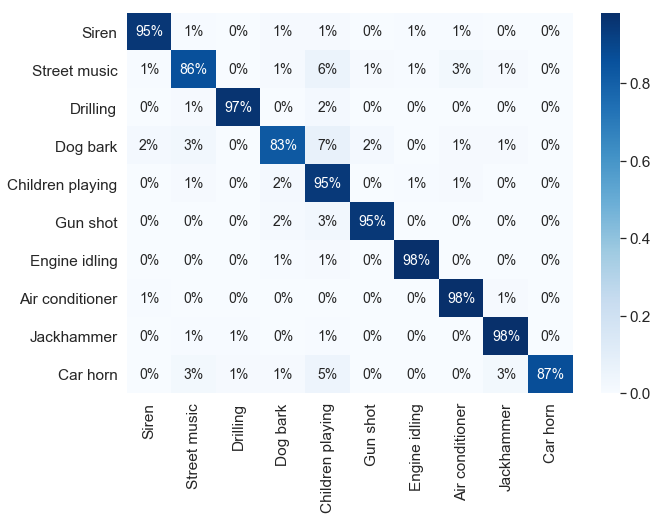

In [153]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(thing, index = [i[1].replace('_', ' ').capitalize() for i in wavcatalog],
                  columns = [i[1].replace('_', ' ').capitalize() for i in wavcatalog])

sn.set(font_scale=1.4)#for label size
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues',annot_kws={"size": 14}, fmt='.0%')# font size